In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
import statsmodels.formula.api as smf

# Importing and Cleaning Data

In [48]:
# use this code to upload csv file 
condo_prices_url = "https://raw.githubusercontent.com/car155/DAO2702-Project/main/Condo_Prices%20(With%20Regions).csv"
listings_url = "https://raw.githubusercontent.com/car155/DAO2702-Project/main/listings%20(detailed).csv"
mrt_url = "https://raw.githubusercontent.com/car155/DAO2702-Project/main/mrtsg.csv"
zipcode_mapper_url = "https://raw.githubusercontent.com/car155/DAO2702-Project/main/sg_zipcode_mapper.csv"

In [49]:
condo_prices = pd.read_csv(condo_prices_url)
condo_prices.head()

,S/N,Project Name,Street Name,Type,Postal District,Region,Market Segment,Tenure,Type of Sale,No. of Units,Price ($),Nett Price ($),Area (Sqft),Type of Area,Floor Level,Unit Price ($psf),Date of Sale
0,610.0,MARINA BAY RESIDENCES,MARINA BOULEVARD,Condominium,1.0,Central Region,CCR,99 yrs lease commencing from 2005,Resale,1.0,1500000.0,-,743.0,Strata,26 to 30,2020.0,Jul-20
1,18.0,HUNDRED TREES,WEST COAST DRIVE,Condominium,5.0,West Region,OCR,956 yrs lease commencing from 1928,Resale,1.0,1190000.0,-,915.0,Strata,01 to 05,1301.0,Oct-20
2,19.0,CARABELLE,WEST COAST WAY,Condominium,5.0,West Region,OCR,956 yrs lease commencing from 1928,Resale,1.0,1260000.0,-,947.0,Strata,01 to 05,1330.0,Oct-20
3,790.0,EMERALD GARDEN,CLUB STREET,Condominium,1.0,Central Region,RCR,999 yrs lease commencing from 1827,Resale,1.0,2450000.0,-,1313.0,Strata,06 to 10,1866.0,Jul-20
4,885.0,EMERALD GARDEN,CLUB STREET,Condominium,1.0,Central Region,RCR,999 yrs lease commencing from 1827,Resale,1.0,1975000.0,-,1033.0,Strata,06 to 10,1911.0,Jul-20


In [50]:
streets = pd.read_csv(zipcode_mapper_url)
streets.head()

,postal,latitude,longtitude,searchval,blk_no,road_name,building,address,postal.1
0,398614,1.312763,103.883519,# 1 LOFT,1,LORONG 24 GEYLANG,# 1 LOFT,1 LORONG 24 GEYLANG # 1 LOFT SINGAPORE 398614,398614
1,398721,1.312390,103.881504,# 1 SUITES,1,LORONG 20 GEYLANG,# 1 SUITES,1 LORONG 20 GEYLANG # 1 SUITES SINGAPORE 398721,398721
2,629875,1.309135,103.679463,1 BENOI ROAD SINGAPORE 629875,1,BENOI ROAD,NIL,1 BENOI ROAD SINGAPORE 629875,629875
3,439731,1.305466,103.895674,1 BOSCOMBE ROAD SINGAPORE 439731,1,BOSCOMBE ROAD,NIL,1 BOSCOMBE ROAD SINGAPORE 439731,439731
4,659592,1.344619,103.749789,1 BUKIT BATOK STREET 22 SINGAPORE 659592,1,BUKIT BATOK STREET 22,NIL,1 BUKIT BATOK STREET 22 SINGAPORE 659592,659592


In [51]:
mrt_stations = pd.read_csv(mrt_url)
mrt_stations.head()

,OBJECTID,STN_NAME,STN_NO,X,Y,Latitude,Longitude,COLOR
0,12,ADMIRALTY MRT STATION,NS10,24402.1063,46918.1131,1.440585,103.800998,RED
1,16,ALJUNIED MRT STATION,EW9,33518.6049,33190.0020,1.316433,103.882893,GREEN
2,33,ANG MO KIO MRT STATION,NS16,29807.2655,39105.7720,1.369933,103.849553,RED
3,81,BAKAU LRT STATION,SE3,36026.0821,41113.8766,1.388093,103.905418,OTHERS
4,80,BANGKIT LRT STATION,BP9,21248.2460,40220.9693,1.380018,103.772667,OTHERS


In [52]:
street_locations = (streets.groupby("road_name").mean()).loc[:, ["latitude", "longtitude"]]
street_locations.head()

,latitude,longtitude
road_name,,
ADAM DRIVE,1.336729,103.814549
ADAM PARK,1.331691,103.812030
ADAM ROAD,1.326875,103.813021
ADIS ROAD,1.301323,103.847671
ADMIRALTY DRIVE,1.450003,103.816163


In [53]:
listings_data = pd.read_csv(listings_url)
listings_data.head()

,id,name,summary,space,description,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_neighbourhood,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,49091,COZICOMFORT LONG TERM STAY ROOM 2,NaN,This is Room No. 2.(available after Jan 15 201...,This is Room No. 2.(available after Jan 15 201...,within an hour,1.0,NaN,f,Woodlands,...,f,f,flexible,t,t,2,0,2,0,0.01
1,50646,Pleasant Room along Bukit Timah,Fully furnished bedroom with a nice view on th...,"Good Condition room, bright & windy. Comes wit...",Fully furnished bedroom with a nice view on th...,NaN,NaN,NaN,f,Bukit Timah,...,f,f,moderate,f,t,1,0,1,0,0.24
2,56334,COZICOMFORT,NaN,This is Room no. 1. USD700 per month On the fa...,This is Room no. 1. USD700 per month On the fa...,within an hour,1.0,NaN,f,Woodlands,...,f,f,flexible,t,t,2,0,2,0,0.18
3,71609,Ensuite Room (Room 1 & 2) near EXPO,For 3 (Website hidden by Airbnb) room 1&2 and ...,Landed Homestay Room for Rental. Between Simei...,For 3 (Website hidden by Airbnb) room 1&2 and ...,within an hour,1.0,1.0,f,Tampines,...,t,f,flexible,f,t,8,0,8,0,0.19
4,71896,B&B Room 1 near Airport & EXPO,NaN,Vocational Stay Deluxe Bedroom in Singapore.(N...,Vocational Stay Deluxe Bedroom in Singapore.(N...,within an hour,1.0,1.0,f,Tampines,...,t,f,moderate,f,t,8,0,8,0,0.22


In [54]:
# updated condo_prices table includes latitude & longtitude 
if (("latitude" in condo_prices.columns) and ("longtitude" in condo_prices.columns)):
    condo_prices.drop(labels=["latitude", "longtitude"], axis=1, inplace=True)
condo_prices = condo_prices.merge(street_locations, how="left", left_on="Street Name", 
                                  right_on="road_name", right_index=False)
condo_prices.dropna(inplace=True)
condo_prices["id"] = condo_prices.index
condo_prices.head()

,S/N,Project Name,Street Name,Type,Postal District,Region,Market Segment,Tenure,Type of Sale,No. of Units,Price ($),Nett Price ($),Area (Sqft),Type of Area,Floor Level,Unit Price ($psf),Date of Sale,latitude,longtitude,id
0,610.0,MARINA BAY RESIDENCES,MARINA BOULEVARD,Condominium,1.0,Central Region,CCR,99 yrs lease commencing from 2005,Resale,1.0,1500000.0,-,743.0,Strata,26 to 30,2020.0,Jul-20,1.280210,103.853533,0
1,18.0,HUNDRED TREES,WEST COAST DRIVE,Condominium,5.0,West Region,OCR,956 yrs lease commencing from 1928,Resale,1.0,1190000.0,-,915.0,Strata,01 to 05,1301.0,Oct-20,1.313543,103.759271,1
2,19.0,CARABELLE,WEST COAST WAY,Condominium,5.0,West Region,OCR,956 yrs lease commencing from 1928,Resale,1.0,1260000.0,-,947.0,Strata,01 to 05,1330.0,Oct-20,1.317607,103.755818,2
3,790.0,EMERALD GARDEN,CLUB STREET,Condominium,1.0,Central Region,RCR,999 yrs lease commencing from 1827,Resale,1.0,2450000.0,-,1313.0,Strata,06 to 10,1866.0,Jul-20,1.281999,103.846088,3
4,885.0,EMERALD GARDEN,CLUB STREET,Condominium,1.0,Central Region,RCR,999 yrs lease commencing from 1827,Resale,1.0,1975000.0,-,1033.0,Strata,06 to 10,1911.0,Jul-20,1.281999,103.846088,4


In [55]:
# function to update the nearest MRT station and distance into condo_prices 
def nearest_MRT(row):
    distance = ((row["latitude"] - mrt_stations["Latitude"])**2 
                + (row["longtitude"] - mrt_stations["Longitude"])**2)**0.5 * 111.2          # 111.2 -> conversion to km 
    
    sorted_dist = np.argsort(distance)
    nearest_MRT = mrt_stations.loc[sorted_dist[0], "STN_NAME"]
    nearest_dist = distance[sorted_dist[0]]
    return pd.Series({"Nearest MRT": nearest_MRT, "Distance to nearest MRT": nearest_dist, "id": row["id"]})

result = condo_prices.apply(nearest_MRT, axis=1, result_type="expand")
if (("Nearest MRT" in condo_prices.columns) and ("Distance to nearest MRT" in condo_prices.columns)):
    condo_prices.drop(labels=["Nearest MRT", "Distance to nearest MRT"], axis=1, inplace=True)
    
condo_prices = condo_prices.merge(result, how="left", on="id")

In [56]:
condo_prices.head()

,S/N,Project Name,Street Name,Type,Postal District,Region,Market Segment,Tenure,Type of Sale,No. of Units,...,Area (Sqft),Type of Area,Floor Level,Unit Price ($psf),Date of Sale,latitude,longtitude,id,Nearest MRT,Distance to nearest MRT
0,610.0,MARINA BAY RESIDENCES,MARINA BOULEVARD,Condominium,1.0,Central Region,CCR,99 yrs lease commencing from 2005,Resale,1.0,...,743.0,Strata,26 to 30,2020.0,Jul-20,1.280210,103.853533,0,DOWNTOWN MRT STATION,0.114995
1,18.0,HUNDRED TREES,WEST COAST DRIVE,Condominium,5.0,West Region,OCR,956 yrs lease commencing from 1928,Resale,1.0,...,915.0,Strata,01 to 05,1301.0,Oct-20,1.313543,103.759271,1,CLEMENTI MRT STATION,0.690327
2,19.0,CARABELLE,WEST COAST WAY,Condominium,5.0,West Region,OCR,956 yrs lease commencing from 1928,Resale,1.0,...,947.0,Strata,01 to 05,1330.0,Oct-20,1.317607,103.755818,2,CLEMENTI MRT STATION,1.096681
3,790.0,EMERALD GARDEN,CLUB STREET,Condominium,1.0,Central Region,RCR,999 yrs lease commencing from 1827,Resale,1.0,...,1313.0,Strata,06 to 10,1866.0,Jul-20,1.281999,103.846088,3,TELOK AYER MRT STATION,0.247983
4,885.0,EMERALD GARDEN,CLUB STREET,Condominium,1.0,Central Region,RCR,999 yrs lease commencing from 1827,Resale,1.0,...,1033.0,Strata,06 to 10,1911.0,Jul-20,1.281999,103.846088,4,TELOK AYER MRT STATION,0.247983


# Cost Analysis

In [57]:
# Create a new dataframe to limit condo prices to $5m
condo_prices_new = condo_prices.loc[condo_prices["Price ($)"] <= 5 * 10**6]
condo_prices_new

,S/N,Project Name,Street Name,Type,Postal District,Region,Market Segment,Tenure,Type of Sale,No. of Units,...,Area (Sqft),Type of Area,Floor Level,Unit Price ($psf),Date of Sale,latitude,longtitude,id,Nearest MRT,Distance to nearest MRT
0,610.0,MARINA BAY RESIDENCES,MARINA BOULEVARD,Condominium,1.0,Central Region,CCR,99 yrs lease commencing from 2005,Resale,1.0,...,743.0,Strata,26 to 30,2020.0,Jul-20,1.280210,103.853533,0,DOWNTOWN MRT STATION,0.114995
1,18.0,HUNDRED TREES,WEST COAST DRIVE,Condominium,5.0,West Region,OCR,956 yrs lease commencing from 1928,Resale,1.0,...,915.0,Strata,01 to 05,1301.0,Oct-20,1.313543,103.759271,1,CLEMENTI MRT STATION,0.690327
2,19.0,CARABELLE,WEST COAST WAY,Condominium,5.0,West Region,OCR,956 yrs lease commencing from 1928,Resale,1.0,...,947.0,Strata,01 to 05,1330.0,Oct-20,1.317607,103.755818,2,CLEMENTI MRT STATION,1.096681
3,790.0,EMERALD GARDEN,CLUB STREET,Condominium,1.0,Central Region,RCR,999 yrs lease commencing from 1827,Resale,1.0,...,1313.0,Strata,06 to 10,1866.0,Jul-20,1.281999,103.846088,3,TELOK AYER MRT STATION,0.247983
4,885.0,EMERALD GARDEN,CLUB STREET,Condominium,1.0,Central Region,RCR,999 yrs lease commencing from 1827,Resale,1.0,...,1033.0,Strata,06 to 10,1911.0,Jul-20,1.281999,103.846088,4,TELOK AYER MRT STATION,0.247983
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47332,4630.0,SYMPHONY SUITES,YISHUN CLOSE,Condominium,27.0,North Region,OCR,99 yrs lease commencing from 2014,New Sale,1.0,...,915.0,Strata,01 to 05,996.0,Oct-15,1.435190,103.844468,50904,YISHUN MRT STATION,1.231135
47333,4631.0,ORCHID PARK CONDOMINIUM,YISHUN STREET 81,Condominium,27.0,North Region,OCR,99 yrs lease commencing from 1991,Resale,1.0,...,958.0,Strata,06 to 10,736.0,Oct-15,1.414324,103.835185,50905,KHATIB MRT STATION,0.419388
47334,4634.0,THE MILTONIA RESIDENCES,MILTONIA CLOSE,Condominium,27.0,North Region,OCR,99 yrs lease commencing from 2010,Resale,1.0,...,592.0,Strata,01 to 05,1012.0,Oct-15,1.417156,103.847312,50906,KHATIB MRT STATION,1.593956
47335,4635.0,SUNRISE GARDENS,SUNRISE AVENUE,Condominium,28.0,North East Region,OCR,99 yrs lease commencing from 1995,Resale,1.0,...,1281.0,Strata,01 to 05,765.0,Oct-15,1.388208,103.857061,50907,YIO CHU KANG MRT STATION,1.526476


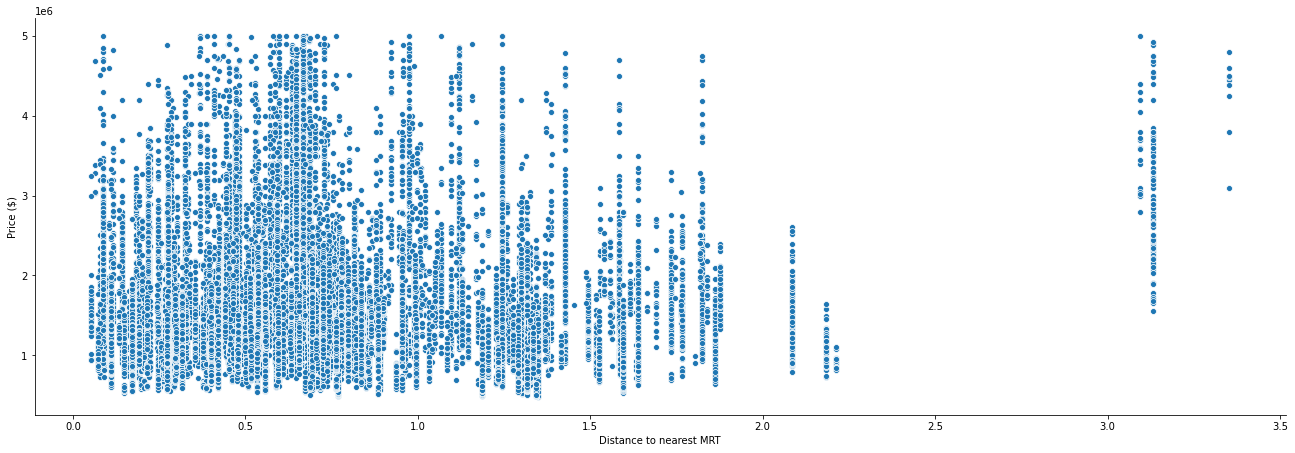

In [58]:
# condo prices (limit to $5m) wrt dist to nearest MRT
sns.pairplot(
    condo_prices_new,
    x_vars= ["Distance to nearest MRT"],      
    y_vars= ["Price ($)"],                   # limit at 5mil 
    height = 6,
    aspect = 3)

#### **Region Against Condo's Unit Price ($psf)**

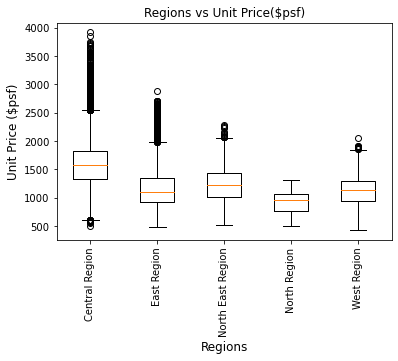

In [59]:
region_data = condo_prices_new.loc[:, ["Region", "Unit Price ($psf)"]].groupby("Region")

labels = []


for (label, df), index in zip(region_data, np.arange(len(region_data))):
  plt.boxplot(df["Unit Price ($psf)"], positions=[index], widths = 0.5)
  labels.append(label)

plt.xlabel("Regions", fontsize = 12)
plt.ylabel("Unit Price ($psf)", fontsize = 12)
plt.xticks(np.arange(len(region_data)) ,labels, rotation=90)
plt.title("Regions vs Unit Price($psf)")
plt.show()

From the given boxplot, we observed a higher median for unit price (psf) 
in the central region. This suggests that the overall condominiums unit price (psf) are more costly in the central region.

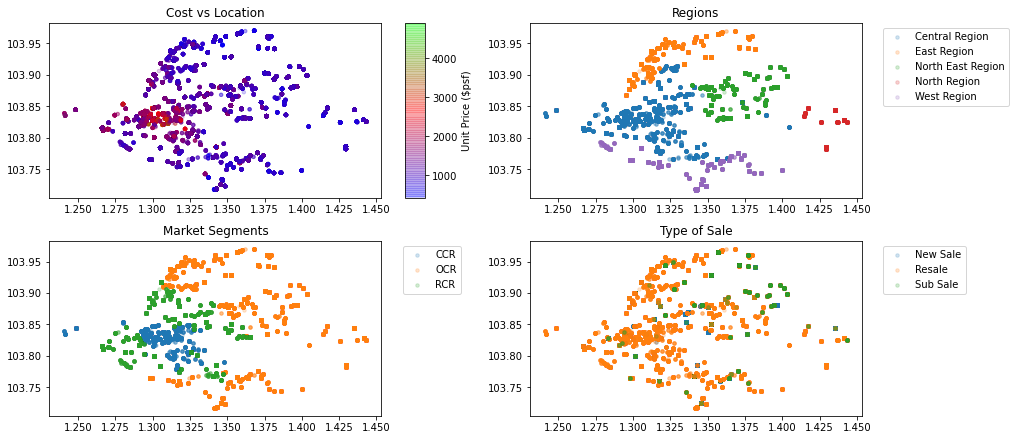

In [60]:
location_data = condo_prices[["Street Name", "Region", "Market Segment", 
                              "Type of Sale", "Price ($)", "Unit Price ($psf)"]].copy()

location_data = location_data.merge(street_locations, how="left", left_on="Street Name", 
                                  right_on="road_name", right_index=False)
location_data.dropna(inplace=True)

fig = plt.figure(constrained_layout=True, figsize=(14, 6))
grid = fig.add_gridspec(2, 2)
ax1 = fig.add_subplot(grid[0, 0])
ax1.set_title("Cost vs Location")
ax2 = fig.add_subplot(grid[0, 1])
ax2.set_title("Regions")
ax3 = fig.add_subplot(grid[1, 0])
ax3.set_title("Market Segments")
ax4 = fig.add_subplot(grid[1, 1])
ax4.set_title("Type of Sale")

plt1 = ax1.scatter(location_data["latitude"], location_data["longtitude"],
            c=location_data["Unit Price ($psf)"], cmap="brg",
            alpha=0.2, s=12)

plt.colorbar(plt1, ax=ax1).set_label("Unit Price ($psf)")

region_data = location_data.groupby("Region")
for (label, df) in region_data:
    ax2.scatter(df["latitude"], df["longtitude"],
            alpha=0.2, s=12,
            label=label)

ax2.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

market_segment_data = location_data.groupby("Market Segment")
for (label, df) in market_segment_data:
    ax3.scatter(df["latitude"], df["longtitude"],
            alpha=0.2, s=12,
            label=label)

ax3.legend(bbox_to_anchor=(1.05, 1), loc="upper left")

sale_type_data = location_data.groupby("Type of Sale")
for (label, df) in sale_type_data:
    ax4.scatter(df["latitude"], df["longtitude"],
            alpha=0.2, s=12,
            label=label)

ax4.legend(bbox_to_anchor=(1.05, 1), loc="upper left")
        
plt.show()

#### **Cost vs Area**

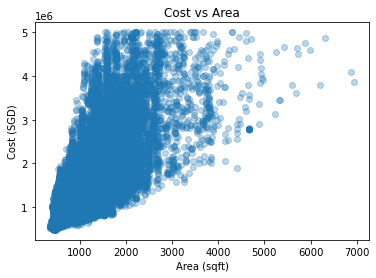

In [61]:
cost = condo_prices_new["Price ($)"]
area = condo_prices_new["Area (Sqft)"]

plt.title("Cost vs Area")
plt.scatter(area, cost,
            alpha=0.3)
plt.xlabel("Area (sqft)")
plt.ylabel("Cost (SGD)")

plt.show()

#### **Cost vs Floor**

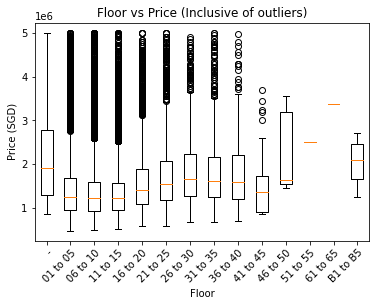

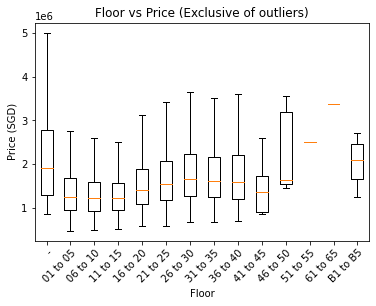

In [62]:
floor_data = condo_prices_new.loc[:, ["Price ($)", "Floor Level"]].groupby("Floor Level")

# With outliers
plt.title("Floor vs Price (Inclusive of outliers)")

for (label, df), index in zip(floor_data, np.arange(len(floor_data))):
    plt.boxplot(df["Price ($)"], positions=[index],
                widths=0.5)
    
pos = condo_prices_new["Floor Level"].unique()
pos.sort()
pos

plt.xticks(np.arange(len(floor_data)), pos,
           rotation=45, ha="right", rotation_mode="anchor")
plt.xlabel("Floor")
plt.ylabel("Price (SGD)")

plt.show()

#Without outliers
plt.title("Floor vs Price (Exclusive of outliers)")

for (label, df), index in zip(floor_data, np.arange(len(floor_data))):
    plt.boxplot(df["Price ($)"], positions=[index],
                widths=0.5, showfliers=False)
    
pos = condo_prices_new["Floor Level"].unique()
pos.sort()
pos

plt.xticks(np.arange(len(floor_data)), pos,
           rotation=45, ha="right", rotation_mode="anchor")
plt.xlabel("Floor")
plt.ylabel("Price (SGD)")

plt.show()

#### **Cost vs Type of Sale**

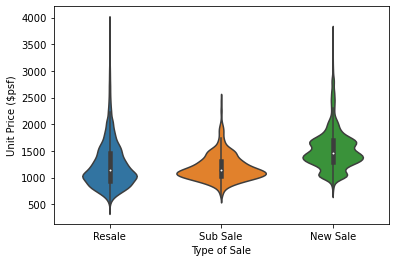

In [63]:
sns.violinplot(x="Type of Sale", y="Unit Price ($psf)", data=condo_prices_new)

Considering for tenure:

In [64]:
condo_prices["Lease"] = condo_prices["Tenure"].str.split(" ").str[0]

short_lease = ((condo_prices["Lease"] != "Freehold") #longer leases
               & (condo_prices["Lease"] != "946") 
               & (condo_prices["Lease"] != "999")
               & (condo_prices["Lease"] != "956") 
               & (condo_prices["Tenure"] != "99 years leasehold")) #no year (1 data point -> relatively insignificant)

short_lease_data = condo_prices.loc[short_lease, 
                                    ["Price ($)", "Unit Price ($psf)", "Type of Sale", "Tenure", "Lease"]].dropna()
long_lease_data = condo_prices.loc[~short_lease & (condo_prices["Tenure"] != "99 years leasehold"), 
                                    ["Price ($)", "Unit Price ($psf)", "Type of Sale", "Tenure", "Lease"]].dropna()

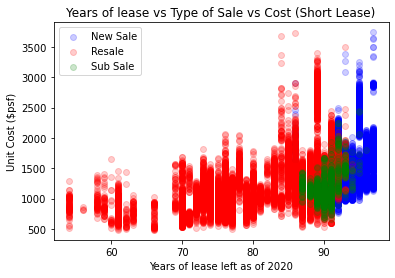

In [65]:
short_lease_data["Lease"] = short_lease_data["Lease"].astype(int)
short_lease_data["Lease From"] = short_lease_data["Tenure"].str[-4:].astype(int)
short_lease_data["Years left as of 2020"] = short_lease_data["Lease From"] + short_lease_data["Lease"] - 2020

new_sale_lease = short_lease_data.loc[short_lease_data["Type of Sale"] == "New Sale"]
resale_lease = short_lease_data.loc[short_lease_data["Type of Sale"] == "Resale"]
sub_sale_lease = short_lease_data.loc[short_lease_data["Type of Sale"] == "Sub Sale"]

bins = np.arange(0, 1000, 10)

plt.title("Years of lease vs Type of Sale vs Cost (Short Lease)")

plt.scatter(new_sale_lease["Years left as of 2020"], new_sale_lease["Unit Price ($psf)"],
         alpha=0.2, c="b",
         label="New Sale")
plt.scatter(resale_lease["Years left as of 2020"], resale_lease["Unit Price ($psf)"],
         alpha=0.2, c="r",
         label="Resale")
plt.scatter(sub_sale_lease["Years left as of 2020"], sub_sale_lease["Unit Price ($psf)"],
         alpha=0.2, c="g",
         label="Sub Sale")

plt.xlabel("Years of lease left as of 2020")
plt.ylabel("Unit Cost ($psf)")
plt.legend()

plt.show()

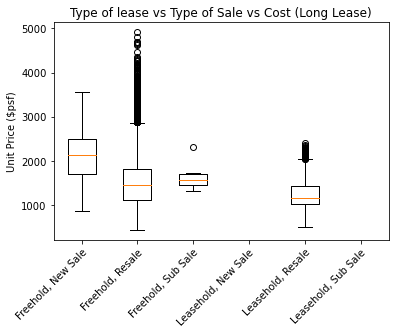

In [66]:
is_freehold = long_lease_data["Lease"] == "Freehold"

freehold_new_sale = long_lease_data.loc[(long_lease_data["Type of Sale"] == "New Sale") & is_freehold]
freehold_resale = long_lease_data.loc[(long_lease_data["Type of Sale"] == "Resale") & is_freehold]
freehold_sub_sale = long_lease_data.loc[(long_lease_data["Type of Sale"] == "Sub Sale") & is_freehold]

leasehold_new_sale = long_lease_data.loc[(long_lease_data["Type of Sale"] == "New Sale") & ~is_freehold]
leasehold_resale = long_lease_data.loc[(long_lease_data["Type of Sale"] == "Resale") & ~is_freehold]
leasehold_sub_sale = long_lease_data.loc[(long_lease_data["Type of Sale"] == "Sub Sale") & ~is_freehold]

plt.title("Type of lease vs Type of Sale vs Cost (Long Lease)")

plt.boxplot(freehold_new_sale["Unit Price ($psf)"], positions=[1],
            widths=0.5)
plt.boxplot(freehold_resale["Unit Price ($psf)"], positions=[2],
            widths=0.5)
plt.boxplot(freehold_sub_sale["Unit Price ($psf)"], positions=[3],
            widths=0.5)
plt.boxplot(leasehold_new_sale["Unit Price ($psf)"], positions=[4],
            widths=0.5)
plt.boxplot(leasehold_resale["Unit Price ($psf)"], positions=[5],
            widths=0.5)
plt.boxplot(leasehold_sub_sale["Unit Price ($psf)"], positions=[6],
            widths=0.5)

plt.ylabel("Unit Price ($psf)")

plt.xticks(range(1, 7), ["Freehold, New Sale",
                         "Freehold, Resale",
                         "Freehold, Sub Sale",
                         "Leasehold, New Sale",
                         "Leasehold, Resale",
                         "Leasehold, Sub Sale"],
          rotation=45, ha="right", rotation_mode="anchor")

plt.show()

# Revenue

In [116]:
listings_data["property_type"].unique()

array(['Apartment', 'Villa', 'House', 'Townhouse', 'Other', 'Condominium',
       'Loft', 'Guest suite', 'Bed and breakfast', 'Serviced apartment',
       'Hostel', 'Bungalow', 'Chalet', 'Boat', 'Hotel', 'Cabin',
       'Guesthouse', 'Boutique hotel', 'Tent', 'Aparthotel', 'Campsite',
       'Bus', 'Heritage hotel (India)', 'Earth house', 'Tiny house',
       'Igloo'], dtype=object)

In [200]:
# calculating demand
#considering specific property types (similar to condominiums) and specific factos
property_type = (listings_data["property_type"] == "Condominium")
#                 | (listings_data["property_type"] == "Apartment"))
listings_data_review = listings_data.loc[property_type,
                               ['reviews_per_month', 'price', 'room_type', 'property_type', 
                                'neighbourhood', 'neighbourhood_group_cleansed','availability_365']].dropna()

listings_data_review.loc[:,'demand'] = 'none'
listings_data_review['demand'] = listings_data_review['reviews_per_month'] # assumption review rate is proportional to demand
listings_rev = listings_data_review.replace([np.inf,-np.inf],np.nan).dropna() # drop infinite numbers

listings_rev["revenue"] = listings_rev["demand"] * listings_rev["price"]
listings_rev["neighbourhood_group_cleansed"] = listings_rev["neighbourhood_group_cleansed"].str[:-7]
listings_rev.head()

,reviews_per_month,price,room_type,property_type,neighbourhood,neighbourhood_group_cleansed,availability_365,demand,revenue
23,0.31,56,Private room,Condominium,Jurong West,West,365,0.31,17.36
28,1.34,210,Entire home/apt,Condominium,Bedok,East,37,1.34,281.40
35,0.01,2620,Entire home/apt,Condominium,Tanglin,Central,0,0.01,26.20
46,0.16,80,Private room,Condominium,Kallang,Central,0,0.16,12.80
78,0.22,180,Entire home/apt,Condominium,Orchard,Central,319,0.22,39.60


#### Price

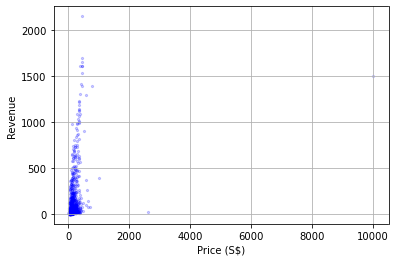

In [159]:
plt.scatter(listings_rev['price'], listings_rev['revenue'], 
            s=5, c='b', alpha=0.2,)

plt.xlabel('Price (S$)')
plt.ylabel('Revenue')
plt.grid()
plt.show()

In [168]:
outliers = listings_data.loc[(listings_data['price'] > 1000) 
                  & property_type
                  & ~(listings_data["reviews_per_month"].isnull())]
outliers[["price", "summary", "space", "description", "neighbourhood"]]

,price,summary,space,description,neighbourhood
35,2620,NaN,Experience true five star living in this stunn...,Experience true five star living in this stunn...,Tanglin
2373,10001,Gorgeous 2 rooms penthouse condominium unit lo...,This is a PROPER TWO ROOM APARTMENT UNIT -thi...,Gorgeous 2 rooms penthouse condominium unit lo...,NaN


There are a few outliers that make it difficult to observe the relationship between price and revenue. the listing with extremely high prices (from 5000 to 13000) tend to be luxury apartments based off the description. This is beyond our budget.

Thus we decided to target on the middle to high income travellers instead of the high end fancy travellers, and also charging at a reasonble price will make us more price attractive as well. Hence we will only look into the listing with prices <1000 since we are only buying a condo.



In [171]:
focus = listings_rev["price"] < 1000
listings_rev = listings_rev.loc[focus]

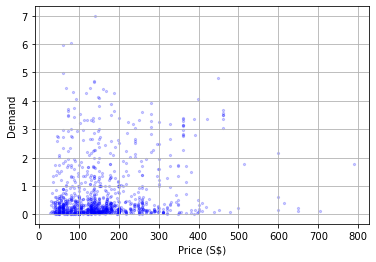

In [172]:
plt.scatter(listings_rev['price'], listings_rev['demand'], 
            s=5, c='b', alpha=0.2,)

plt.xlabel('Price (S$)')
plt.ylabel('Demand')
plt.grid()
plt.show()

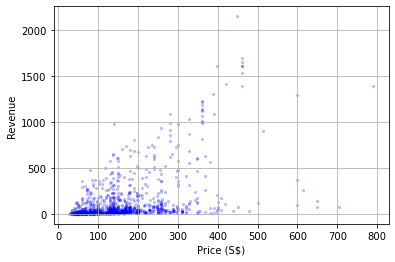

In [173]:
plt.scatter(listings_rev['price'], listings_rev['revenue'], 
            s=5, c='b', alpha=0.2,)

plt.xlabel('Price (S$)')
plt.ylabel('Revenue')
plt.grid()
plt.show()

From the demand against price plot above, it implies that higher prices leads to higher revenue, despite higher prices also leading to a fall in demand. 

#### Region

Text(3.674999999999997, 0.5, 'Revenue')

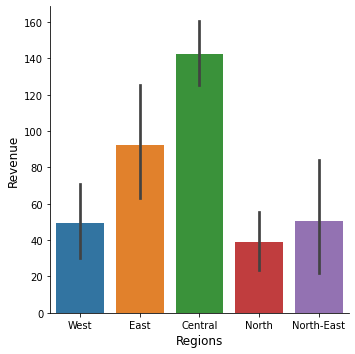

In [184]:
# error bar of east region is relatively high, values are more spread out, less reliable (https://datavizcatalogue.com/methods/error_bars.html) 
sns.catplot(x='neighbourhood_group_cleansed', y='revenue', kind='bar', data=listings_rev)
plt.xlabel('Regions', fontSize=12)
plt.ylabel('Revenue', fontSize=12)

Text(-2.700000000000003, 0.5, 'Revenue')

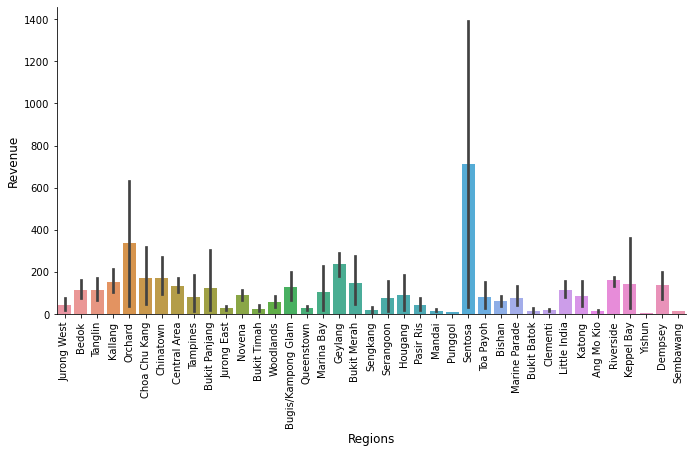

In [209]:
# error bar of east region is relatively high, values are more spread out, less reliable (https://datavizcatalogue.com/methods/error_bars.html) 

sns.catplot(x='neighbourhood', y='revenue', kind='bar', data=listings_rev, height=5, aspect=2)
plt.xticks(rotation=90)
plt.xlabel('Regions', fontSize=12)
plt.ylabel('Revenue', fontSize=12)

As shown from the figure, demand for airbnb in the central and est region are significantly higher than the other regions, with central region being the highest in demand.



#### **Demand vs Room Types**

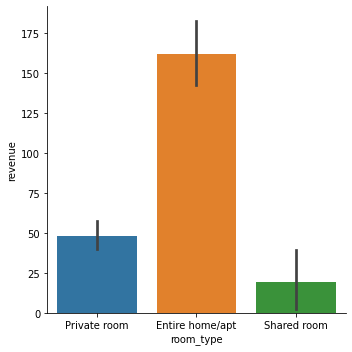

In [180]:
sns.catplot(x='room_type', y='revenue', kind="bar", data=listings_rev)

In [187]:
rev_entire = listings_rev.loc[(listings_rev['room_type']=='Entire home/apt'),:]
rev_private = listings_rev.loc[(listings_rev['room_type'] == 'Private room'),:]
rev_shared = listings_rev.loc[(listings_rev['room_type'] == 'Shared room'),:]

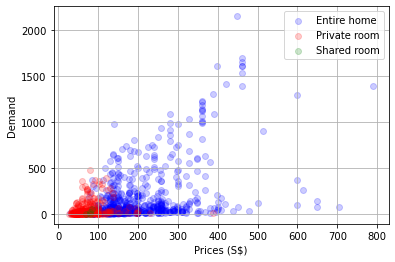

In [198]:
plt.scatter(rev_entire['price'], rev_entire['revenue'], 
            c='b', alpha=0.2,
            label='Entire home')

plt.scatter(rev_private['price'], rev_private['revenue'], 
             c='r', alpha=0.2,
            label='Private room')

plt.scatter(rev_shared['price'], rev_shared['revenue'], 
           c='g', alpha=0.2,
            label='Shared room')

plt.xlabel('Prices (S$)')
plt.ylabel('Demand')
plt.legend()
plt.grid()

plt.show()